## NLP Sentiment Analysis

The following project examine different methods for sentences sentiment analysis.


In each method we used different approch to represent each sentence as a feature vector.<br>
One of our methods is unique, evolved as an improvment on top of standard method.<br>
we explain our intuition and show the results of our method.  

### Data

our main Dataset was taken from kaggle competition <br>
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data  <br>
each example in our dataset contain these features:
    - unique PhraseId
    - original sentenceId
    - Pharse
    - label- sentiment 

sentiment is from 0 - very negative to 4- very positive.<br>
In this project, we decided to focus on distinguishing positive sentiment vs. negative sentiment.
 

In [11]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import matplotlib.image as mpimg
def plot_image(path):
    img = mpimg.imread(path)
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.imshow(img)

In [13]:
data = pd.read_csv('train.tsv', sep='\t', header=0)

In [14]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In addition to our dataset, we used the following resources in building our models:
    - nltk is a NLP library. we used movie reviews corpus from nltk as additional training data for word2vec model,            for our new method. we don't use the sentiments labeling each sentence, to keep the comparison fair
      
    - positive and negative words dictionaries , found in:
    https://github.com/sisoputnfrba/mr-py-twitterSentiment/tree/master/dicts

In [15]:
# load lists of positive and negative dicts
pos_negative_dict = {}
pos_negative_dict['pos'] = pickle.load( open( "positive_list.lst", "rb" ) )
pos_negative_dict['neg'] = pickle.load( open( "negative_list.lst", "rb" ) )

### Data Preprocessing

we did the following steps as preprocess phase:
   - sentence labels were transfered to 0 for negatives and 1 for positives.
   - each sentence was tokenized to word list. we based our tokenizer on http://sentiment.christopherpotts.net/tokenizing.html , as he showed more robust behaviour than treebank and whitespace tokenizers
   - we change all words in the word list to lowercase
   - we removed stopwords from word list using nltk stoplist corpus

In [16]:
NUM_OF_PHARSE = data.shape[0]
data['Sentiment'] = [float(data['Sentiment'].iloc[k]) for k in range(NUM_OF_PHARSE)]

In [17]:
#tokenize each pharse to list of words

In [18]:
from tokenizing import Tokenizer

In [19]:
tok = Tokenizer(preserve_case=False)
data['Phrase_tokens'] = data['Phrase'].apply(tok.tokenize)


In [20]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                      Phrase_tokens  
0        1.0  [a, series, of, escapades, demonstrating, the,...  
1        2.0  [a, series, of, escapades, demonstrating, the,...  
2        2.0                                        [a, series]  
3        2.0                                                [a]  
4        2.0                                           [series]

In [21]:
TRAIN_RATIO=0.8
TRAIN_SIZE = np.int(NUM_OF_PHARSE*TRAIN_RATIO)

In [22]:
sentiment_dict = {}
max_train = TRAIN_SIZE #use only train data to build sentiment dict
iterator = data.iterrows()
  
for _ in range(max_train):  
    index,row = iterator.next()
    word_list = row['Phrase_tokens']
    if len(word_list)==1:
        sentiment_dict[word_list[0].lower()] = data['Sentiment'][index]

In [23]:
#add "binary sentiment" (bad(0), good(1), neutral(2))

data['Binary_Sentiment']=[data['Sentiment'].iloc[k] if data['Sentiment'].iloc[k] == 2.0 else np.round(data['Sentiment'].iloc[k]/4) for k in range(NUM_OF_PHARSE)]

In [24]:
# remove neutral sentences
NEW_TRAIN_SIZE = data[:TRAIN_SIZE][data[:TRAIN_SIZE]["Binary_Sentiment"] != 2.0].shape[0]
data = data[data["Binary_Sentiment"] != 2.0]

In [25]:
# Remove stop words from phrases

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords # Import the stop word list
print stopwords.words("english") 



[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [26]:
data['Phrase_tokens'] = data['Phrase_tokens'].apply(lambda words:[w for w in words if not w in stopwords.words("english") and w.isalpha()])

C:\Users\oernst\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
data = pd.DataFrame(data[data['Phrase_tokens'].str.len() >0])
data = data.reset_index(drop=True)

In [28]:
data.head(10)

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        22           1                                 good for the goose   
2        23           1                                               good   
3        34           1  the gander , some of which occasionally amuses...   
4        47           1                                             amuses   
5        48           1       but none of which amounts to much of a story   
6        50           1           none of which amounts to much of a story   
7        64           2  This quiet , introspective and entertaining in...   
8        65           2  This quiet , introspective and entertaining in...   
9        67           2  quiet , introspective and entertaining indepen...   

   Sentiment                                      Phrase_tokens  \
0        1.0  [series, escapades, demonstrating, adage, good...   
1        3.0                                      [good, goose]   
2        3.0                                             [good]   
3        1.0  [gander, occasionally, amuses, none, amounts, ...   
4        3.0                                           [amuses]   
5        1.0                       [none, amounts, much, story]   
6        1.0                       [none, amounts, much, story]   
7        4.0  [quiet, introspective, entertaining, independe...   
8        3.0  [quiet, introspective, entertaining, independent]   
9        4.0  [quiet, introspective, entertaining, independent]   

   Binary_Sentiment  
0               0.0  
1               1.0  
2               1.0  
3               0.0  
4               1.0  
5               0.0  
6               0.0  
7               1.0  
8               1.0  
9               1.0

### Methods for creating feature vector

we now exam different methods for extracting feature vectors from our preproccessed data. 

###  Approch 1:  features engneering

#### use the following features to represent each sentense:
    - avg sentiment of the words in the pharse - weighted by tfidf weights
    - max sentiment in phrase
    - min sentiment in pharse
    - number of positive words in the phrase (from predefined dictionary)
    - number of negative words in the phrase (from predefined dictionary)
    - sentence length
    - does the sentence contain negation words
    - number of question marks in the phrase
    - number of exclamation marks in the phrase
    - number of ellipsis  in the phrase
    - number of all caps words in the phrase


#### min,max,avg calc of sentiment

In [29]:
#count each term appearance for TF-IDF weights
count_dict = {}
for i,word_list in enumerate(data['Phrase_tokens'][:NEW_TRAIN_SIZE]):
    for word in word_list:
        word = word.lower()
        if count_dict.has_key(word):
           count_dict[word] = count_dict[word] + 1
        else:
            count_dict[word] = 1
            

In [30]:
num_document_train = NEW_TRAIN_SIZE

def TF_IDF_weighting(word):
    if count_dict.has_key(word):
        return np.log(num_document_train/(count_dict[word]))
    else: return 1


In [31]:
def creat_sentiment_list(word_list):
    sent_list = []
    for word in word_list:
        word_sent  = sentiment_dict.get(word.lower(),2)
        sent_list.append(word_sent)
    return sent_list

data['sentiment list'] = data['Phrase_tokens'].apply(creat_sentiment_list)
data['max sentiment'] = data['sentiment list'].apply(lambda x: max(x))
data['min sentiment'] =  data['sentiment list'].apply(lambda x: min(x))

In [32]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        22           1                                 good for the goose   
2        23           1                                               good   
3        34           1  the gander , some of which occasionally amuses...   
4        47           1                                             amuses   

   Sentiment                                      Phrase_tokens  \
0        1.0  [series, escapades, demonstrating, adage, good...   
1        3.0                                      [good, goose]   
2        3.0                                             [good]   
3        1.0  [gander, occasionally, amuses, none, amounts, ...   
4        3.0                                           [amuses]   

   Binary_Sentiment                                     sentiment list  \
0               0.0  [2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, ...   
1               1.0                                         [3.0, 2.0]   
2               1.0                                              [3.0]   
3               0.0                [2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0]   
4               1.0                                              [3.0]   

   max sentiment  min sentiment  
0            3.0            2.0  
1            3.0            2.0  
2            3.0            3.0  
3            3.0            2.0  
4            3.0            3.0

In [33]:
def weight_sentiment(word_list,sentiment_list):
    weight_list = []
    for word in word_list:
        word_TF_IDF =  TF_IDF_weighting(word.lower())
        weight_list.append(word_TF_IDF)
    weight_sum = sum(weight_list)
    return np.dot(sentiment_list,weight_list)/weight_sum

In [34]:
weighted_avg = []
for word_list,sentiment_list in zip(data['Phrase_tokens'],data['sentiment list']):
    result = weight_sentiment(word_list,sentiment_list)
    weighted_avg.append(result)
data['avg sentiment']=  pd.Series(weighted_avg)


In [35]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        22           1                                 good for the goose   
2        23           1                                               good   
3        34           1  the gander , some of which occasionally amuses...   
4        47           1                                             amuses   

   Sentiment                                      Phrase_tokens  \
0        1.0  [series, escapades, demonstrating, adage, good...   
1        3.0                                      [good, goose]   
2        3.0                                             [good]   
3        1.0  [gander, occasionally, amuses, none, amounts, ...   
4        3.0                                           [amuses]   

   Binary_Sentiment                                     sentiment list  \
0               0.0  [2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, ...   
1               1.0                                         [3.0, 2.0]   
2               1.0                                              [3.0]   
3               0.0                [2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0]   
4               1.0                                              [3.0]   

   max sentiment  min sentiment  avg sentiment  
0            3.0            2.0       2.168524  
1            3.0            2.0       2.308885  
2            3.0            3.0       3.000000  
3            3.0            2.0       2.204863  
4            3.0            3.0       3.000000

In [36]:
for sentiment,sentiment_list in pos_negative_dict.items():

        def count_sentiment_words(word_list):
            counter = 0 
            lower_pharse = [x.lower() for x in word_list]
            for word in lower_pharse:
                if word in sentiment_list:
                    counter+=1
            return counter
        
        data['contain_'+sentiment+ '_words'] = data['Phrase_tokens'].apply(lambda word_list: count_sentiment_words(word_list))


In [37]:
data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1        22           1                                 good for the goose   
2        23           1                                               good   
3        34           1  the gander , some of which occasionally amuses...   
4        47           1                                             amuses   

   Sentiment                                      Phrase_tokens  \
0        1.0  [series, escapades, demonstrating, adage, good...   
1        3.0                                      [good, goose]   
2        3.0                                             [good]   
3        1.0  [gander, occasionally, amuses, none, amounts, ...   
4        3.0                                           [amuses]   

   Binary_Sentiment                                     sentiment list  \
0               0.0  [2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, ...   
1               1.0                                         [3.0, 2.0]   
2               1.0                                              [3.0]   
3               0.0                [2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0]   
4               1.0                                              [3.0]   

   max sentiment  min sentiment  avg sentiment  contain_neg_words  \
0            3.0            2.0       2.168524                  0   
1            3.0            2.0       2.308885                  0   
2            3.0            3.0       3.000000                  0   
3            3.0            2.0       2.204863                  0   
4            3.0            3.0       3.000000                  0   

   contain_pos_words  
0                  2  
1                  1  
2                  1  
3                  0  
4                  0

In [38]:
data['sentence length'] = data['Phrase'].apply(lambda sentence:  len(sentence.split()))

In [39]:
data['contain negation words'] = data['Phrase'].apply(lambda word_list:  any(word in word_list for word in ('not','no','lack of')))

In [40]:
data['question mark number'] = data['Phrase'].apply(lambda sentence: sentence.count('?') )

In [41]:
data['exclamation mark number'] = data['Phrase'].apply(lambda sentence: sentence.count('!'))

In [42]:
data['ellipsis number'] = data['Phrase'].apply(lambda sentence: sentence.count('...'))

In [43]:
def count_uppercase_words(sentense):
    is_upper = [w.isupper() for w in sentense.split()]
    return is_upper.count(True)
data['all caps words number'] = data['Phrase'].apply(lambda sentence: count_uppercase_words(sentence))

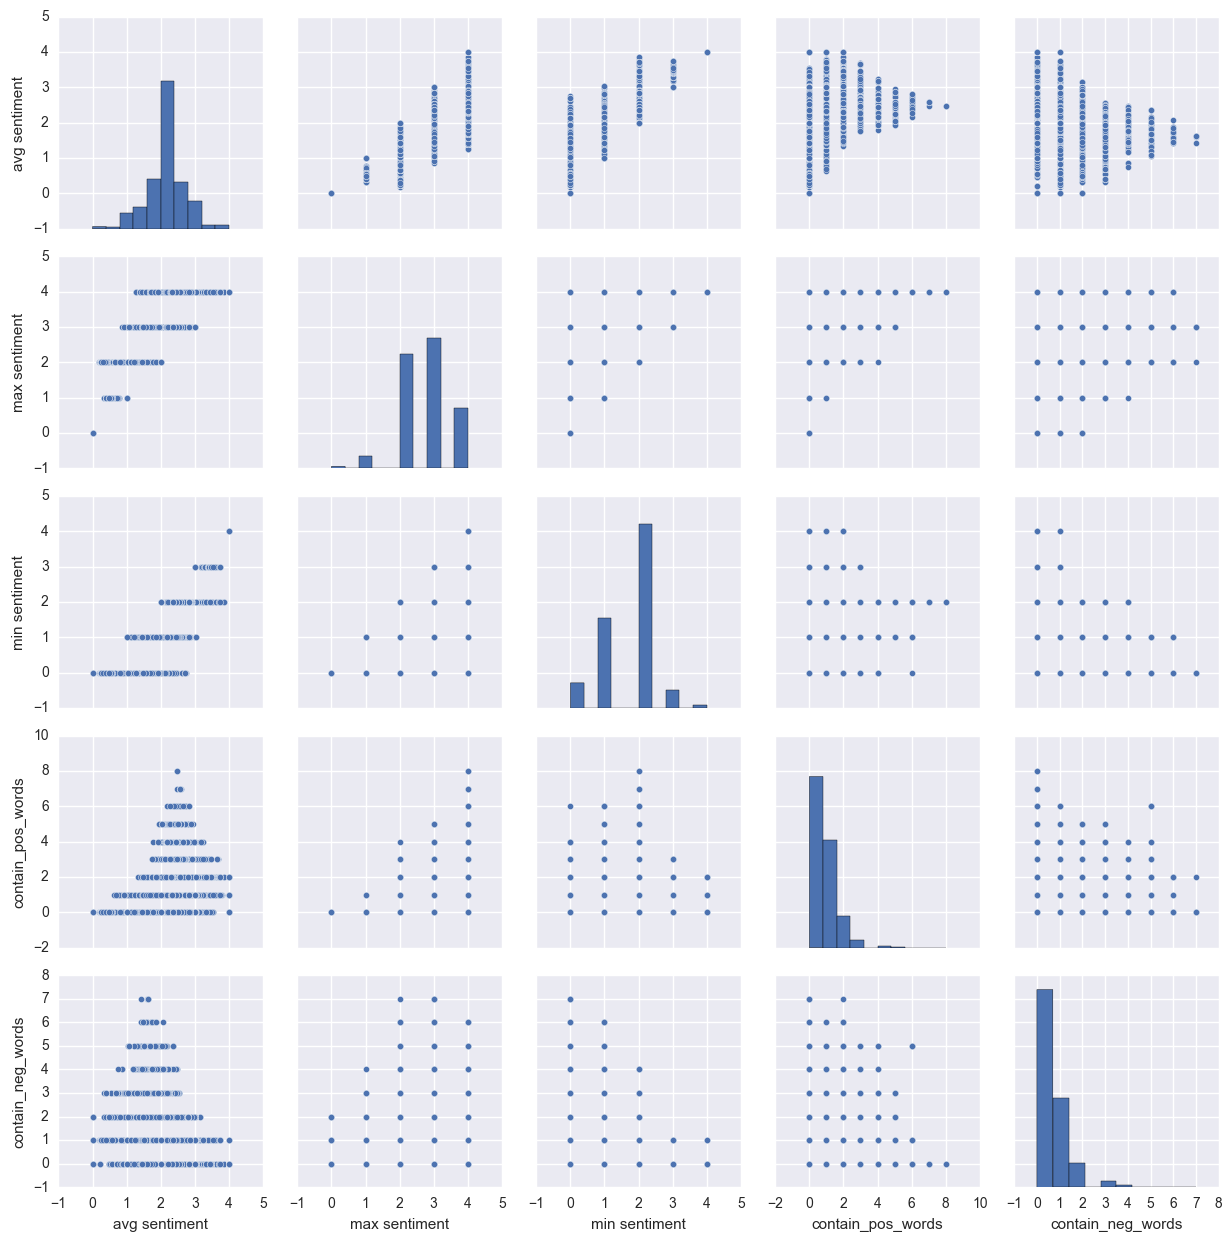

In [44]:
plot_data = data[['avg sentiment', 'max sentiment', 'min sentiment','contain_pos_words','contain_neg_words']]
sns.pairplot(plot_data)

    we can see reasonable correlation between the min,max sentiment and avg sentiment 
    we can see mild correlation between max_sentiment and positive words number 

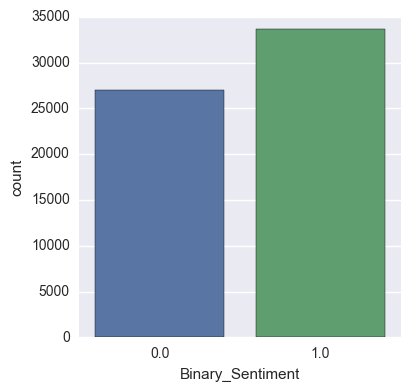

In [45]:
sns.factorplot("Binary_Sentiment",data=data.iloc[:NEW_TRAIN_SIZE],kind = "count")

we can see that the labels are relatively balanced, after defining them as positive and negative

In [46]:
data['Binary_Sentiment'].count()

75644

#### feature selection

before training on our feature vector, we are using univariate statistical chi2 test to choose our 8 best features, to remove noisy features from the data

In [47]:
# train on ~90% of the data and check on the rest

In [48]:
# select only features columms. split to train and test datasets
from sklearn.preprocessing import normalize

feature_list = ['avg sentiment', 'max sentiment', 'min sentiment','contain_pos_words','contain_neg_words','sentence length','contain negation words','exclamation mark number','question mark number','ellipsis number','all caps words number']
features = data[feature_list]
features = normalize(features)
x_train,y_train = features[:NEW_TRAIN_SIZE],data['Binary_Sentiment'][:NEW_TRAIN_SIZE]
x_test,y_test = features[NEW_TRAIN_SIZE:],data['Binary_Sentiment'][NEW_TRAIN_SIZE:]


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction


test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(x_train, y_train)

In [50]:
print(fit.scores_.tolist())
features = fit.transform(x_train)
features_t = fit.transform(x_test)

[274.9946366781286, 275.938524196581, 435.4357363111583, 1037.3919865246605, 1512.7417333514095, 186.80333360788308, 58.93488466787275, 0.6973371296792948, 5.290482098537735, 0.9580172303215923, 0.1931445361177102]


### check results of classifiers

we trained several classifiers with each feature vector method. we use the following classifiers:
 - linear SVM
 - logistic regression
 - random forest
 - neural network
 - ensamble of all classifiers.

In [51]:
# train on ~90% of the data and check on the rest

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
def NN_Classifier(vector_len):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=vector_len))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Using Theano backend.


In [54]:
def classify_and_predict_data(features,labels,t_features,t_labels,vector_lenght,epochs):
    seed(1245)
    all_predictions =[]
    accuracies = []
    model_NN = NN_Classifier(vector_len=vector_lenght)
    print "train NN \n \n"
    model_NN.fit(features,np_utils.to_categorical(np.array(labels)),nb_epoch=epochs, batch_size=32, verbose=1)
    predict = model_NN.predict(t_features)
    predict = np.argmax(predict,axis=1)
    all_predictions.append(predict)
    print "\n results model NN \n \n"
    print classification_report(t_labels,predict)
    acc = accuracy_score(t_labels, predict)
    print "accracy is: {}\n".format(acc)
    accuracies.append(acc)
    
    model_logic = LogisticRegression()
    model_randomforest = RandomForestClassifier(n_jobs=3,n_estimators = 20,random_state = 1)
    model_linearSvm  = svm.LinearSVC(random_state=0)

    models_sets = [('logistic_reg', model_logic),('forest',model_randomforest),('svm', model_linearSvm)]
    for model_name, model in models_sets :
        model.fit(features,labels)
        predict = model.predict(t_features)
        all_predictions.append(predict)
        print "results model {} \n \n".format(model_name)
        print classification_report(t_labels,predict)
        acc = accuracy_score(t_labels, predict)
        print "accracy is: {}\n".format(acc)
        accuracies.append(acc)
        
    models = dict(models_sets)
    models['NN']=model_NN
    return all_predictions,accuracies,models

In [55]:
def ensamble_results(all_predictions):
    all_predictions = np.array(all_predictions)
    hard_predictions = np.round(np.mean(all_predictions,axis=0))
    print classification_report(y_test,hard_predictions)
    acc = accuracy_score(y_test,hard_predictions)
    print "accracy is: {}\n".format(acc)
    return acc

### check results ensamble classifiers

In [56]:
predictions,acc,models= classify_and_predict_data(features,y_train,features_t,y_test,8,20)

train NN 
 



C:\Users\oernst\AppData\Local\Continuum\Anaconda2\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60628/60628 [==============================] - 0s - loss: 0.5417 - acc: 0.7161     
Epoch 2/20
60628/60628 [==============================] - 0s - loss: 0.5118 - acc: 0.7329     
Epoch 3/20
60628/60628 [==============================] - 0s - loss: 0.5077 - acc: 0.7354     
Epoch 4/20
60628/60628 [==============================] - 0s - loss: 0.5043 - acc: 0.7377     
Epoch 5/20
60628/60628 [==============================] - 0s - loss: 0.5015 - acc: 0.7389     
Epoch 6/20
60628/60628 [==============================] - 0s - loss: 0.4989 - acc: 0.7398     
Epoch 7/20
60628/60628 [==============================] - 0s - loss: 0.4967 - acc: 0.7421     
Epoch 8/20
60628/60628 [==============================] - 0s - loss: 0.4948 - acc: 0.7421     
Epoch 9/20
60628/60628 [==============================] - 0s - loss: 0.4934 - acc: 0.7431     
Epoch 10/20
60628/60628 [==============================] - 0s - loss: 0.4924 - acc: 0.7445     
Epoch 11/20
60628/60628 [========================

In [57]:
ensamble_res = ensamble_results(predictions)
acc.append(ensamble_res)

             precision    recall  f1-score   support

        0.0       0.71      0.70      0.71      6942
        1.0       0.74      0.76      0.75      8074

avg / total       0.73      0.73      0.73     15016

accracy is: 0.731086840703



In [58]:
# create dataframe for all accuracy results
accuracies_df = pd.DataFrame(columns=['NN','logisticReg','randomForest','SVM','ensamble'])

In [59]:
accuracies_df.loc[accuracies_df.shape[0]] = acc
accuracies_df.head()

NN  logisticReg  randomForest       SVM  ensamble
0  0.732019     0.727091      0.704915  0.728157  0.731087

#### features analysing

In [60]:
models['forest'].feature_importances_ 

array([ 0.14414321,  0.15344742,  0.15701225,  0.20491862,  0.16865846,
        0.13566787,  0.03473076,  0.0014214 ])

In [61]:
abs(models['logistic_reg'].coef_)

array([[  9.68391951,   3.51638523,   5.92068522,  11.84524817,
          7.74849531,   2.61860361,   6.4822309 ,   1.86958405]])

We can see that both random forest classifier and logistic regression classifier agreed that whether the pharse contain positive words is the most important feature. <br>They both agreed that exsistence of negative words and the tfidf wighted average of sentiment in the pharse are important fot classifing. <br> Random forest gave the min and max sentiment in the pharse more segnificant than lr gave.<br> Lr considered exsitence of negation words ("not","lack") while random forest merely weighted it.

# bag of words

We will split the data again (same split), but taking only the Phrase itself, and creating Bag Of Words.
BOW is a representation of a document (or phrase in our case), which we could treat as features, and train.
Our intuition is that it should work better than the naive way, because the naive way doesn't represent all words in the sentence, so BOW gives us more information.

The disadvantage of BOW, is that it loses the order and connection between words, but we think that for sentiment analisys, it should be fine. We don't have to understand the exact meaning of the sentence,but to know if it is negative or positive.

In [62]:
# split train and test


(X_train,X_test) = (data['Phrase_tokens'].iloc[:NEW_TRAIN_SIZE],data['Phrase_tokens'].iloc[NEW_TRAIN_SIZE:])
(Y_train,Y_test) = (data.Binary_Sentiment.iloc[:NEW_TRAIN_SIZE],data.Binary_Sentiment.iloc[NEW_TRAIN_SIZE:])

In [63]:
data.shape

(75644, 18)

In [64]:
type(X_train.iloc[0:5])

pandas.core.series.Series

In [65]:
#creating vocabulary
#NUM_OF_TRAIN = X_train.shape[0]
vocab = []
for i in range(NEW_TRAIN_SIZE):
    vocab.extend(X_train.iloc[i])
    
print(len(vocab))


291735


In [66]:
NEW_TRAIN_SIZE

60628

In [67]:
vocab_small = list(set(vocab)) #union same words
vocab_tiny = [vocab_small[k] for k in range(len(vocab_small)) if vocab.count(vocab_small[k]) > 16] #discard rare words

This is the vocabulary length (and number of features, as well):

In [68]:
len(vocab_tiny)

3420

Here we implemented by ourselves the BOW model.
For each phrase, we counted how many times each word appears:

In [69]:
#creating bag of words train & test
NUM_OF_PHARSE = data.shape[0]
bag_of_words = np.zeros((NUM_OF_PHARSE,len(vocab_tiny)))
for i in range(NUM_OF_PHARSE):
    for word in data['Phrase_tokens'].iloc[i]:
        if word in vocab_tiny:
            indx = vocab_tiny.index(word)
            bag_of_words[i][indx] +=1
            
(bag_of_words_train,bag_of_words_test) = (bag_of_words[:NEW_TRAIN_SIZE],bag_of_words[NEW_TRAIN_SIZE:])

Let's look at our test data!
As we wrote, each phrase represented by vocabulary with ~3000 words. In order to see the relationship between phrases, we used TSNE model, which embedded the ~3000 words vocabulary into 2 dimensions, but still saves proportion.

In [70]:
# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of positive and negative phrases from test data",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
sent_vectors_pos =  [bag_of_words_test[w] for w in range(1000) if Y_test.iloc[w]==1.0]
sent_vectors_neg =  [bag_of_words_test[w] for w in range(1000) if Y_test.iloc[w]==0.0]
NUM_OF_POS_SENT = len(sent_vectors_pos)
sent_vectors = sent_vectors_pos+sent_vectors_neg

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(sent_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


#tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = tsne_df.iloc[:NUM_OF_POS_SENT]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 1.0], columns=['x', 'y'])
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = tsne_df.iloc[NUM_OF_POS_SENT:]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 0.0], columns=['x', 'y'])
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='positive_phrases')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='negative_phrases',fill_color='red',line_color="red")
#hover = plot_tfidf.select(dict(type=HoverTool))
#hover.tooltips={"word":  "@words"}
show(plot_tfidf)

Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.086s...
[t-SNE] Computed neighbors for 1000 samples in 5.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.230804
[t-SNE] Error after 1000 iterations: 0.985456


In case you can't see the graph (we had some issue with the 'bokeh' graphes using notebook), we add it here as an image:

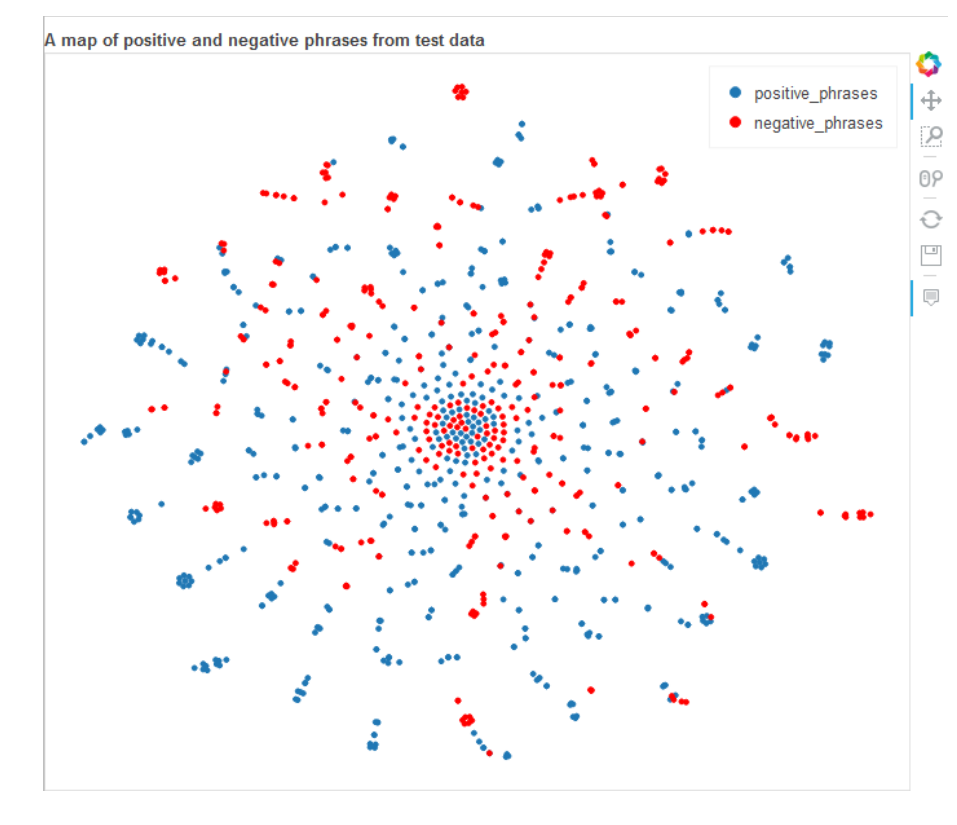

In [71]:
plot_image('bag_of_words.png')

We can see in the graph above we got something looks like a sun. The reason, as we can see, that each "ray" represent other sentence. In our data each sentence divided to some phrase- phrase for each words, phrase for each couple and etc.

So, in every ray in our sun, there are all phrases connected to same sentence, which make sense..

Let's train the model:
Starting with NN with 1 layer:

In [72]:
predictions,acc,models = classify_and_predict_data(bag_of_words_train,Y_train,bag_of_words_test,Y_test,len(vocab_tiny),9)

train NN 
 

Epoch 1/9
60628/60628 [==============================] - 5s - loss: 0.4794 - acc: 0.7691     
Epoch 2/9
60628/60628 [==============================] - 5s - loss: 0.3919 - acc: 0.8177     
Epoch 3/9
60628/60628 [==============================] - 6s - loss: 0.3788 - acc: 0.8227     
Epoch 4/9
60628/60628 [==============================] - 5s - loss: 0.3742 - acc: 0.8246     
Epoch 5/9
60628/60628 [==============================] - 5s - loss: 0.3704 - acc: 0.8278     
Epoch 6/9
60628/60628 [==============================] - 5s - loss: 0.3688 - acc: 0.8272     
Epoch 7/9
60628/60628 [==============================] - 5s - loss: 0.3671 - acc: 0.8286     
Epoch 8/9
60628/60628 [==============================] - 5s - loss: 0.3663 - acc: 0.8281     
Epoch 9/9
60628/60628 [==============================] - 5s - loss: 0.3652 - acc: 0.8295     

 results model NN 
 

             precision    recall  f1-score   support

        0.0       0.78      0.65      0.71      6942
        1.0

In [73]:
res = ensamble_results(predictions)


             precision    recall  f1-score   support

        0.0       0.77      0.67      0.72      6942
        1.0       0.75      0.83      0.78      8074

avg / total       0.76      0.76      0.75     15016

accracy is: 0.755394246137



In [74]:
acc.append(res)
accuracies_df.loc[accuracies_df.shape[0]] = acc

We will concluse all results at the end.

## word2vec

Word2vec is a word representation model, which suppose to create embbeding vector for each word, but save words with same context close to each other.

There are some varients for this algorithm. We learned and used skip gram varient.

In skip gram, we use a very poor network, which multiply each word with its real context and dummy context (and insert to sigmoid). Real context labeled 1 and dummy 0.

The gradient is applied over the word (representation) itself, which means that every iteration the weights that should be updated, are the word representation itself.

So, every iteration, each word "changes its place".
The idea is, that words with same context, such as 'good' and 'great' (many times we can replace the word 'good' with 'great'.), will go through same "flow"- they have same real context words, so those 2 words will have similar gradients, and will be located at the same place.

W2v is a standart word embedding method. In order to represent a phrase, we used mean of all words in the phrase.
We know, there is doc2vec algorithm, which maybe should fit better for this problem, but becuase of the popularity of w2v, we wanted to study it well.

In [75]:
import pandas as pd # provide sql-like data manipulation tools. very handy.
pd.options.mode.chained_assignment = None
import numpy as np # high dimensional vector computing library.
from numpy.random import seed
seed(1)
from copy import deepcopy
from string import punctuation
from random import shuffle

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class
LabeledSentence = gensim.models.doc2vec.LabeledSentence # we'll talk about this down below

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\oernst\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [76]:
def labelizePhrases(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

X_train = labelizePhrases(X_train, 'TRAIN')
X_test = labelizePhrases(X_test, 'TEST')

60628it [00:00, 167019.21it/s]
15016it [00:00, 366242.76it/s]


In [77]:
X_train[0]

TaggedDocument(words=[u'series', u'escapades', u'demonstrating', u'adage', u'good', u'goose', u'also', u'good', u'gander', u'occasionally', u'amuses', u'none', u'amounts', u'much', u'story'], tags=['TRAIN_0'])

At this stage at our work, we used pretraind w2v model from google, with 300 dimentions:

In [78]:
n_dim = 300
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

For example, the representaion of the word 'good':

In [79]:
w2v_model['good']

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484,
       -0.01263428,  0.00964355,  0.12353516, -0.02148438,  0.15234375,
       -0.05834961, -0.10644531,  0.02124023,  0.13574219, -0.13183594,
        0.17675781,  0.27148438,  0.13769531, -0.17382812, -0.14160156,
       -0.03076172,  0.19628906, -0.03295898,  0.125     ,  0.25390625,
        0.12695312, -0.15234375,  0.03198242,  0.01135254, -0.01361084,
       -0.12890625,  0.01019287,  0.23925781, -0.08447266,  0.140625  ,
        0.13085938, -0.04516602,  0.06494141,  0.02539062,  0.05615234,
        0.24609375, -0.20507812,  0.23632812, -0.00860596, -0.02294922,
        0.05078125,  0.10644531, -0.03564453,  0.08740234, -0.05712891,
        0.08496094,  0.23535156, -0.10107422, -0.03564453, -0.04736328,
        0.04736328, -0.14550781, -0.10986328,  0.14746094, -0.23242188,
       -0.07275391,  0.19628906, -0.37890625, -0.07226562,  0.04833984,
        0.11914062,  0.06103516, -0.12109375, -0.27929688,  0.05

Let's look at the closest words to the word 'good':

In [80]:
w2v_model.most_similar('good')

[(u'great', 0.7291510105133057),
 (u'bad', 0.7190051078796387),
 (u'terrific', 0.6889115571975708),
 (u'decent', 0.6837348341941833),
 (u'nice', 0.6836092472076416),
 (u'excellent', 0.644292950630188),
 (u'fantastic', 0.6407778859138489),
 (u'better', 0.6120728850364685),
 (u'solid', 0.5806034803390503),
 (u'lousy', 0.5764203071594238)]

We can see here many positive words, as expected.
In addition, we can see the word 'bad'.
Although, 'good' and 'bad' are opposite words, they have the same context (we can replace 'good' with 'bad' in many sentences).
The small distance between 'good' and 'bad' (as example), could make the sentiment analisys mission harder. We will try to solve this issue later.

Now, we will take a positive words and negative words vocabularies, and try to figure out their "place" (representaion) influence on our dataset and mission.

In [81]:
import pickle
pos_words = pickle.load( open( "positive_list.lst", "rb" ) )
neg_words = pickle.load( open( "negative_list.lst", "rb" ) )
pos_neg_words = pos_words+neg_words
NUM_OF_POS_WORDS = len([w for w in pos_words if w in w2v_model])

In [82]:
NUM_OF_POS_WORDS

1857

In [83]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of positive and negative word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = [w2v_model[w] for w in pos_neg_words if w in w2v_model]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = tsne_df.iloc[:NUM_OF_POS_WORDS]
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = tsne_df.iloc[NUM_OF_POS_WORDS:]
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='positive_words')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='negative_words',fill_color='red',line_color="red")
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6299 samples in 0.085s...
[t-SNE] Computed neighbors for 6299 samples in 20.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6299
[t-SNE] Computed conditional probabilities for sample 2000 / 6299
[t-SNE] Computed conditional probabilities for sample 3000 / 6299
[t-SNE] Computed conditional probabilities for sample 4000 / 6299
[t-SNE] Computed conditional probabilities for sample 5000 / 6299
[t-SNE] Computed conditional probabilities for sample 6000 / 6299
[t-SNE] Computed conditional probabilities for sample 6299 / 6299
[t-SNE] Mean sigma: 0.814595
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.107452
[t-SNE] Error after 1000 iterations: 2.959470


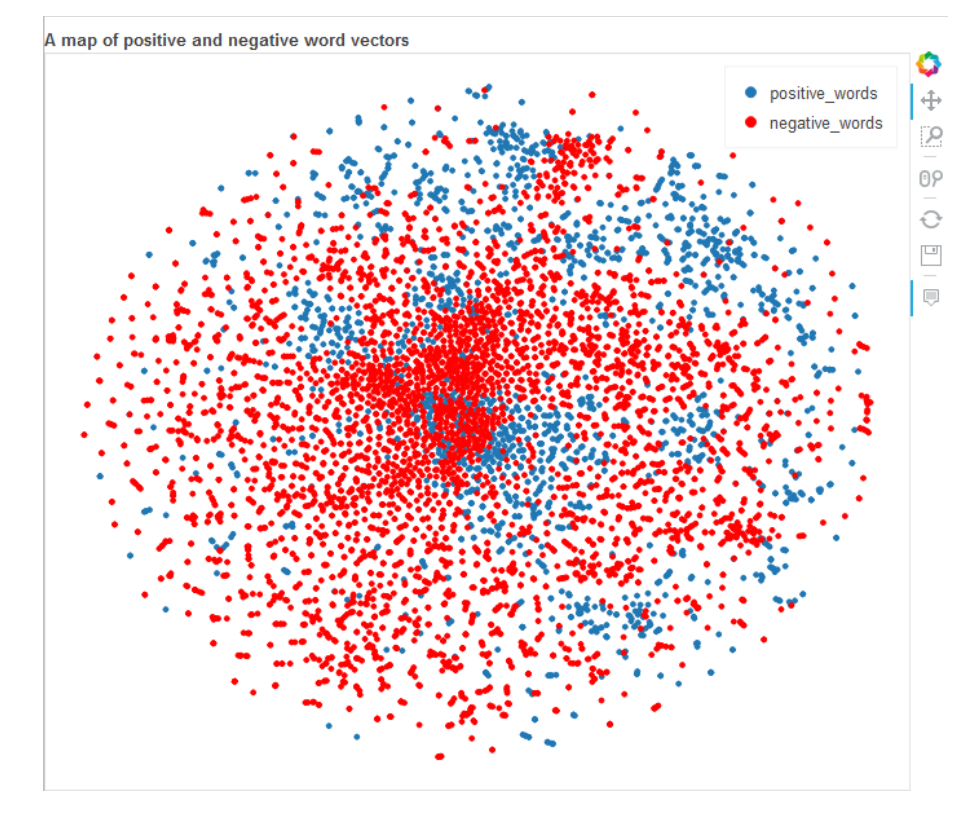

In [84]:
plot_image('words.png')

As you can see, the positive and negative words are shuffled together.

In [85]:
tsne_df.head()

x          y      words
0  -1.584035 -21.949989   sufficed
1 -16.283665   9.391535     pardon
2   2.182713 -10.845034      saver
3  24.589212 -11.601998  desirable
4  41.631119  59.241302   spacious

Creating our train and test, by apply w2v model and averaging words in pharse.

In [86]:
from gensim.models import Word2Vec

def buildWordVector(tokens, size,w2v_model):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
           # if word in pos_neg_words:
            #    k=5
            #else:
            #    k=1    
            vec += w2v_model[word].reshape((1, size))#*k #* tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [87]:
n_dim = 300
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, n_dim,w2v_model) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, n_dim,w2v_model) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v = scale(test_vecs_w2v)

100%|█████████████████████████| 15016/15016 [00:00<00:00, 30707.56it/s]


Now when we have representaion for every phrase, we can look a bit at the data.
Here we will look at the TSNE of our phrases. We will check phrases with positive words, against phrases with negative words.

In [88]:
data['Positive_word'] = pd.Series([any(word in pos_words for word in phrase) for phrase in data['Phrase_tokens']])
data['Negative_word'] = pd.Series([any(word in neg_words for word in phrase) for phrase in data['Phrase_tokens']])

In [89]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of phrases with positive or negative words from test data",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
sent_vectors_pos =  [test_vecs_w2v[w] for w in range(test_vecs_w2v.shape[0]) if data['Positive_word'].iloc[NEW_TRAIN_SIZE+w]]#test_vecs_w2v[:2000,:]#[test_vecs_w2v_bin[w,:] for w in range(10)]#(test_vecs_w2v_bin.shape[0])]
sent_vectors_neg =  [test_vecs_w2v[w] for w in range(test_vecs_w2v.shape[0]) if data['Negative_word'].iloc[NEW_TRAIN_SIZE+w]]
NUM_OF_POS_SENT = len(sent_vectors_pos)
sent_vectors = sent_vectors_pos+sent_vectors_neg

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(sent_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


#tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = tsne_df.iloc[:NUM_OF_POS_SENT]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 1.0], columns=['x', 'y'])
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = tsne_df.iloc[NUM_OF_POS_SENT:]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 0.0], columns=['x', 'y'])
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='phrases_with_positive_words')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='phrases_with_negative_words',fill_color='red',line_color="red")
#hover = plot_tfidf.select(dict(type=HoverTool))
#hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12853 samples in 0.170s...
[t-SNE] Computed neighbors for 12853 samples in 89.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12853
[t-SNE] Computed conditional probabilities for sample 2000 / 12853
[t-SNE] Computed conditional probabilities for sample 3000 / 12853
[t-SNE] Computed conditional probabilities for sample 4000 / 12853
[t-SNE] Computed conditional probabilities for sample 5000 / 12853
[t-SNE] Computed conditional probabilities for sample 6000 / 12853
[t-SNE] Computed conditional probabilities for sample 7000 / 12853
[t-SNE] Computed conditional probabilities for sample 8000 / 12853
[t-SNE] Computed conditional probabilities for sample 9000 / 12853
[t-SNE] Computed conditional probabilities for sample 10000 / 12853
[t-SNE] Computed conditional probabilities for sample 11000 / 12853
[t-SNE] Computed conditional probabilities for sample 12000 / 12853
[t-SNE] Computed conditional probabilities for sa

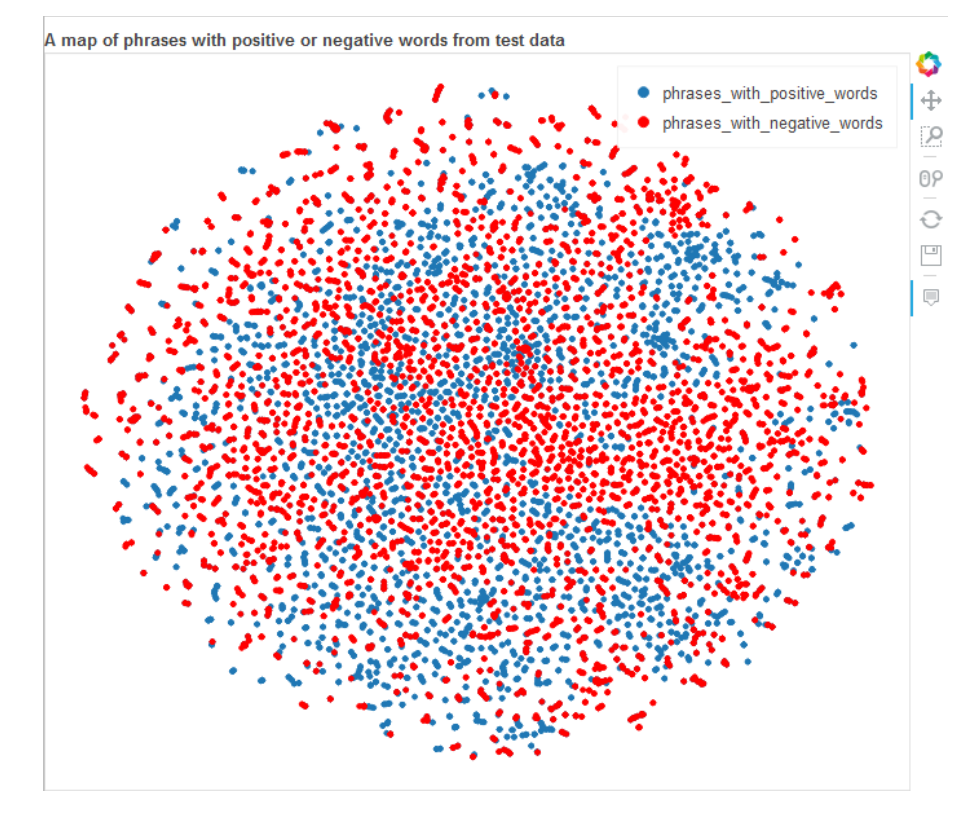

In [90]:
plot_image('phrases_with_sentiment_words.png')

Now, we will look at same view, but divide it to positive phrases, and negative ones.

In [91]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 1000 positive and negative phrases from test data",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = test_vecs_w2v[:2500,:]#[test_vecs_w2v_bin[w,:] for w in range(10)]#(test_vecs_w2v_bin.shape[0])]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


#tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = pd.DataFrame([tsne_df.iloc[w] for w in range(2500) if Y_test.iloc[w] == 1.0], columns=['x', 'y'])
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = pd.DataFrame([tsne_df.iloc[w] for w in range(2500) if Y_test.iloc[w] == 0.0], columns=['x', 'y'])
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='positive_phrases')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='negative_phrases',fill_color='red',line_color="red")
#hover = plot_tfidf.select(dict(type=HoverTool))
#hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.024s...
[t-SNE] Computed neighbors for 2500 samples in 2.714s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 6.681473
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.101219
[t-SNE] Error after 1000 iterations: 1.305229


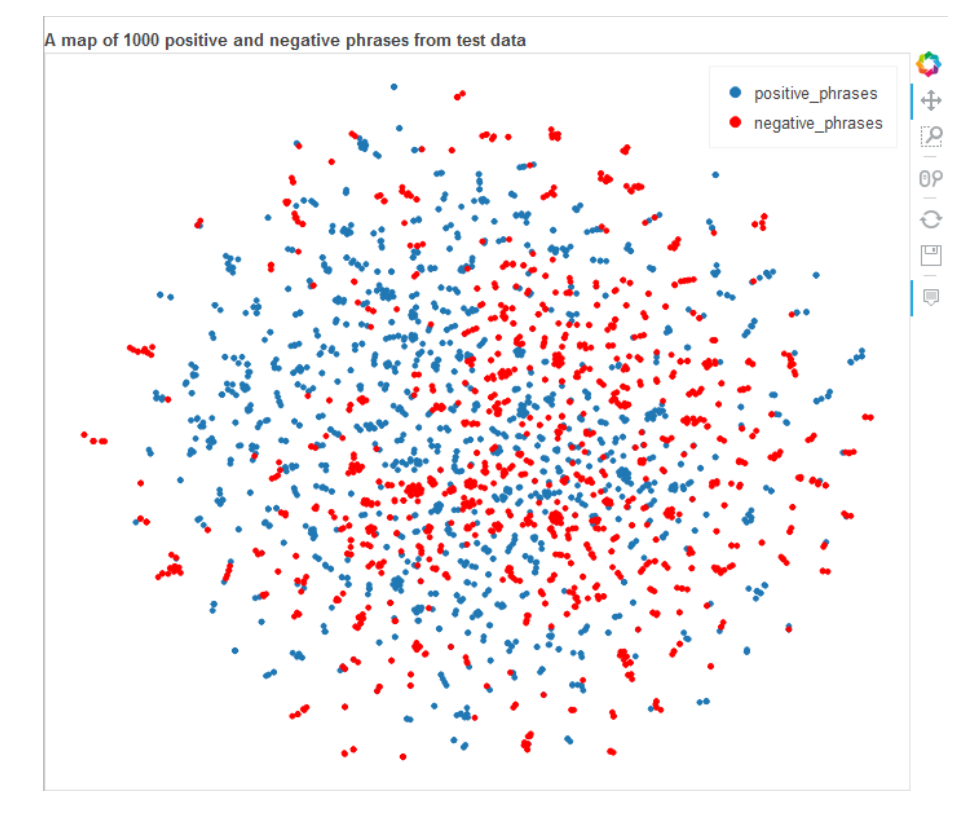

In [92]:
plot_image('sentiment_phrases.png')

The reson why we can see some groups in the graph above, is that our dataset has different phrase for any word in the original sentence, and for any couple of words from that sentence, and so on.
So, we have many close phrases. That's why we see those groups.



Now, we will train our w2v data.

We think it will improve the results, because w2v is better representation- it is smaller, and using context.

In [93]:
all_pred,acc,models = classify_and_predict_data(train_vecs_w2v,Y_train,test_vecs_w2v,Y_test,300,4)

train NN 
 

Epoch 1/4
60628/60628 [==============================] - 0s - loss: 0.4091 - acc: 0.8203     
Epoch 2/4
60628/60628 [==============================] - 0s - loss: 0.3563 - acc: 0.8483     
Epoch 3/4
60628/60628 [==============================] - 0s - loss: 0.3290 - acc: 0.8641     
Epoch 4/4
60628/60628 [==============================] - 0s - loss: 0.3072 - acc: 0.8756     

 results model NN 
 

             precision    recall  f1-score   support

        0.0       0.79      0.79      0.79      6942
        1.0       0.82      0.82      0.82      8074

avg / total       0.81      0.81      0.81     15016

accracy is: 0.806073521577

results model logistic_reg 
 

             precision    recall  f1-score   support

        0.0       0.82      0.77      0.79      6942
        1.0       0.81      0.85      0.83      8074

avg / total       0.81      0.81      0.81     15016

accracy is: 0.813532232286

results model forest 
 

             precision    recall  f1-score   s

In [94]:
res = ensamble_results(all_pred)

             precision    recall  f1-score   support

        0.0       0.80      0.81      0.80      6942
        1.0       0.83      0.82      0.83      8074

avg / total       0.82      0.82      0.82     15016

accracy is: 0.815729888119



In [95]:
acc.append(res)
accuracies_df.loc[accuracies_df.shape[0]] = acc

Let's try simple words classification:

In [96]:
good = buildWordVector(['good'], n_dim,w2v_model) 


In [97]:
models['forest'].predict(good)

array([ 1.])

In [98]:
bad = buildWordVector(['bad'], n_dim,w2v_model) 
#bad = scale(bad)
models['forest'].predict(bad)

array([ 1.])

As you can see, our model had mistaken in this simple example. Even though it doesn't contain any cynicism or "not" words, it did wrong.

Why is that?

This is because, that as we mentioned the words "good" and "bad", are very close in w2v model.

We will try to solve it in our next model.

In the graphes below, you can see, that we have more positive words in positive phrases, than in negative phrases. And opposite - more negative words in negative phrases, than in positive phrases.



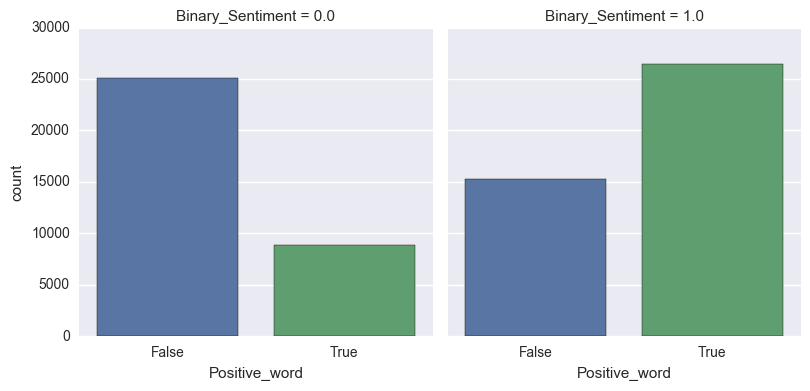

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.factorplot("Positive_word",col = "Binary_Sentiment",data=data,kind = "count")

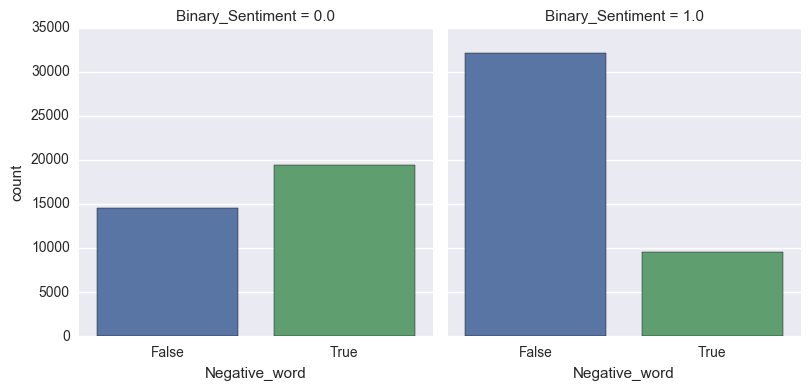

In [100]:
sns.factorplot("Negative_word",col = "Binary_Sentiment",data=data,kind = "count")

In addition, 38% of our phrases contains negative words, and 45% contains positive words.

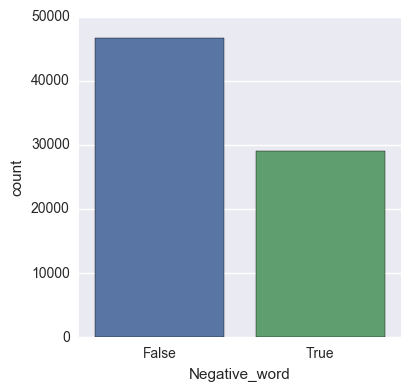

In [101]:
sns.factorplot("Negative_word",data=data,kind = "count")

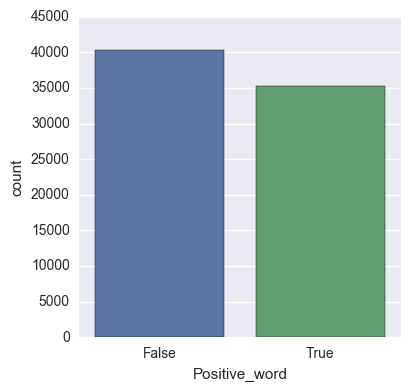

In [102]:
sns.factorplot("Positive_word",data=data,kind = "count")


As we saw in previous graphs, representation of positive words and negative words, are very simillar.

Maybe, if we will seperate them, it will increase our accuracy.


# Varient of W2V- seperate positive and negative words

In order to seperate good and bad words, we decided to use w2v algorithm with its pretrained model.

As described before, 'good' and 'bad' go through same process, and that's why they have close embbeding.

If we want to seperate them, we will have to insert difference in the process that positive and negative words going through.

We use pretrained keras model of w2v, and did finetune to this model.

We took a list of positive and negative words as a reference.
We went through nltk movie reviews dataset looking for words from our list.
When we found a word, we insert it to our w2v keras model with its context (nearest words), but instead of labeling at as "1" (because it is real context), we labeled it by the sentiment-

If the word we found is positive, we labeled it as "1", and if negative, as "0".

Now, positive and negative words should "meet" the same context, but get different labels. As a result, they should grow apart from each other.  

The code of our model can be found in different file ("KerasWord2VecSeperateNogPos.py").
Here we will used only the trained weights.

In [103]:
#from kerasWord2VecSeparateNegPos import load_Keyedvectors
w2v_new_model = gensim.models.KeyedVectors.load('./saved_keywords_10_epoch.bin')

In [104]:
w2v_new_model.most_similar('good')

[(u'great', 0.8313500881195068),
 (u'decent', 0.7954795956611633),
 (u'nice', 0.7876308560371399),
 (u'terrific', 0.7854228019714355),
 (u'excellent', 0.7660362124443054),
 (u'better', 0.7626707553863525),
 (u'fantastic', 0.757211446762085),
 (u'solid', 0.746983528137207),
 (u'wonderful', 0.7306249737739563),
 (u'best', 0.7271173000335693)]

As we can see, 'bad' is no longer similar to 'good'.

In fact, all most similar words to 'good' are positive!

Here we will present the same graphs as above, only now, for the new model.

3 graphs as before:

a. Map of positive and negative words embedding.

b. Map of sentences embedding with positive and negative words.

c. Map of positive and negative sentences. (This is what we want to improve eventually)

In [105]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of positive and negative word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = [w2v_new_model[w] for w in pos_neg_words if w in w2v_new_model]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


tsne_df['words'] = [w for w in pos_neg_words if w in w2v_new_model]
tsne_df_pos = tsne_df.iloc[:NUM_OF_POS_WORDS]
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = tsne_df.iloc[NUM_OF_POS_WORDS:]
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='positive_words')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='negative_words',fill_color='red',line_color="red")
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6299 samples in 0.095s...
[t-SNE] Computed neighbors for 6299 samples in 20.940s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6299
[t-SNE] Computed conditional probabilities for sample 2000 / 6299
[t-SNE] Computed conditional probabilities for sample 3000 / 6299
[t-SNE] Computed conditional probabilities for sample 4000 / 6299
[t-SNE] Computed conditional probabilities for sample 5000 / 6299
[t-SNE] Computed conditional probabilities for sample 6000 / 6299
[t-SNE] Computed conditional probabilities for sample 6299 / 6299
[t-SNE] Mean sigma: 0.818924
[t-SNE] KL divergence after 250 iterations with early exaggeration: 113.591393
[t-SNE] Error after 1000 iterations: 2.918971


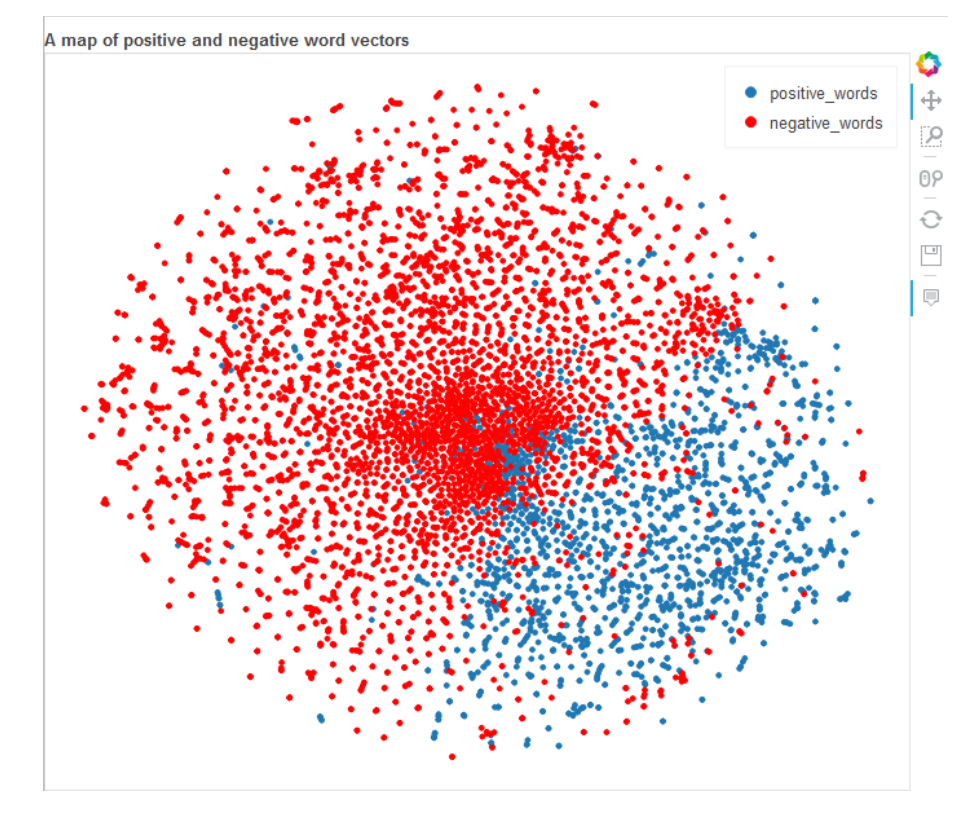

In [106]:
plot_image('words_SA_w2v.png')

In [107]:
train_vecs_w2v_new = np.concatenate([buildWordVector(z, n_dim,w2v_new_model) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v_new = scale(train_vecs_w2v_new)

test_vecs_w2v_new = np.concatenate([buildWordVector(z, n_dim,w2v_new_model) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v_new = scale(test_vecs_w2v_new)

100%|█████████████████████████| 15016/15016 [00:00<00:00, 33147.90it/s]


In [108]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of phrases with positive or negative words from test data",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
sent_vectors_pos =  [test_vecs_w2v_new[w] for w in range(test_vecs_w2v_new.shape[0]) if data['Positive_word'].iloc[NEW_TRAIN_SIZE+w]]#test_vecs_w2v[:2000,:]#[test_vecs_w2v_bin[w,:] for w in range(10)]#(test_vecs_w2v_bin.shape[0])]
sent_vectors_neg =  [test_vecs_w2v_new[w] for w in range(test_vecs_w2v_new.shape[0]) if data['Negative_word'].iloc[NEW_TRAIN_SIZE+w]]
NUM_OF_POS_SENT = len(sent_vectors_pos)
sent_vectors = sent_vectors_pos+sent_vectors_neg

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(sent_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


#tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = tsne_df.iloc[:NUM_OF_POS_SENT]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 1.0], columns=['x', 'y'])
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = tsne_df.iloc[NUM_OF_POS_SENT:]#pd.DataFrame([tsne_df.iloc[w] for w in range(2000) if Y_test[w] == 0.0], columns=['x', 'y'])
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='phrases_with_positive_words')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='phrases_with_negative_words',fill_color='red',line_color="red")
#hover = plot_tfidf.select(dict(type=HoverTool))
#hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12853 samples in 0.158s...
[t-SNE] Computed neighbors for 12853 samples in 80.832s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12853
[t-SNE] Computed conditional probabilities for sample 2000 / 12853
[t-SNE] Computed conditional probabilities for sample 3000 / 12853
[t-SNE] Computed conditional probabilities for sample 4000 / 12853
[t-SNE] Computed conditional probabilities for sample 5000 / 12853
[t-SNE] Computed conditional probabilities for sample 6000 / 12853
[t-SNE] Computed conditional probabilities for sample 7000 / 12853
[t-SNE] Computed conditional probabilities for sample 8000 / 12853
[t-SNE] Computed conditional probabilities for sample 9000 / 12853
[t-SNE] Computed conditional probabilities for sample 10000 / 12853
[t-SNE] Computed conditional probabilities for sample 11000 / 12853
[t-SNE] Computed conditional probabilities for sample 12000 / 12853
[t-SNE] Computed conditional probabilities for sa

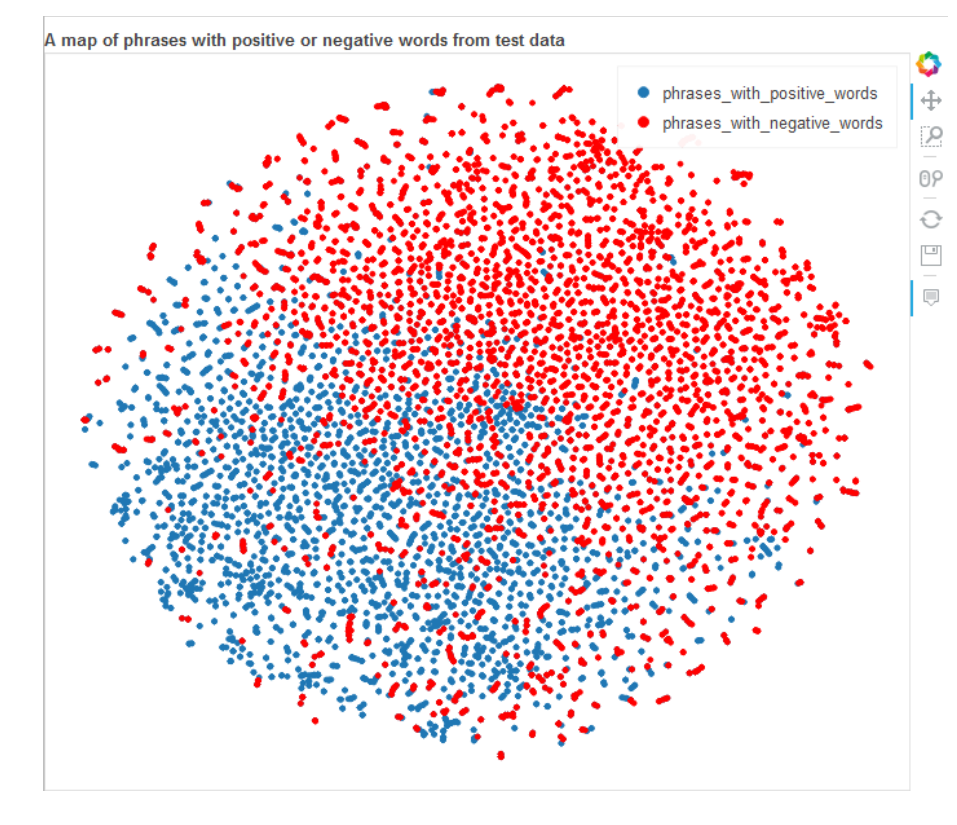

In [109]:
plot_image('phrases_with_sentiment_words_SA_w2v.png')

In [110]:
# defining the chart
#output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 1000 positive and negative phrases from test data",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = test_vecs_w2v_new[:2500,:]#[test_vecs_w2v_bin[w,:] for w in range(10)]#(test_vecs_w2v_bin.shape[0])]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])


#tsne_df['words'] = [w for w in pos_neg_words if w in w2v_model]
tsne_df_pos = pd.DataFrame([tsne_df.iloc[w] for w in range(2500) if Y_test.iloc[w] == 1.0], columns=['x', 'y'])
tsne_bp_pos = bp.ColumnDataSource(tsne_df_pos)

tsne_df_neg = pd.DataFrame([tsne_df.iloc[w] for w in range(2500) if Y_test.iloc[w] == 0.0], columns=['x', 'y'])
tsne_bp_neg = bp.ColumnDataSource(tsne_df_neg)


# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_pos,legend='positive_phrases')
plot_tfidf.scatter(x='x', y='y', source=tsne_bp_neg,legend='negative_phrases',fill_color='red',line_color="red")
#hover = plot_tfidf.select(dict(type=HoverTool))
#hover.tooltips={"word":  "@words"}
show(plot_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.026s...
[t-SNE] Computed neighbors for 2500 samples in 2.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 6.344339
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.718094
[t-SNE] Error after 1000 iterations: 1.259198


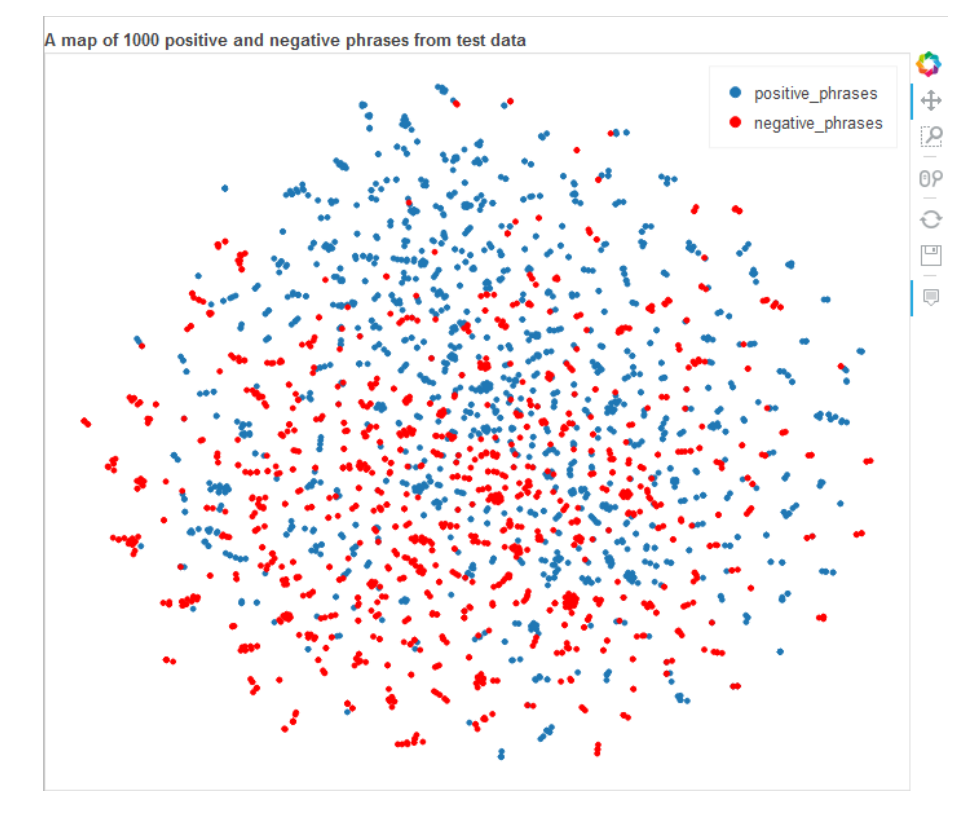

In [111]:
plot_image('sentiment_phrases_SA_w2v.png')

In the graphs above we can see that:

a. It divides the positive and negative words embedding realy nice. It is easy now to classify it with linear classifier.

b. As a result, it divides also the sentences embedding with positive and negative words realy good.

c. Because of there is no full correlation between positive sentences, and sentences with positive words, the third graph doesn't divide the positive and negative sentences so clearly, but it improves the original w2v model.

Now, we will train again our classifiers:

In [112]:
all_pred,acc,models = classify_and_predict_data(train_vecs_w2v_new,Y_train,test_vecs_w2v_new,Y_test,300,4)

train NN 
 

Epoch 1/4
60628/60628 [==============================] - 0s - loss: 0.4085 - acc: 0.8203     
Epoch 2/4
60628/60628 [==============================] - 1s - loss: 0.3574 - acc: 0.8486     
Epoch 3/4
60628/60628 [==============================] - 0s - loss: 0.3300 - acc: 0.8637     
Epoch 4/4
60628/60628 [==============================] - 0s - loss: 0.3078 - acc: 0.8756     

 results model NN 
 

             precision    recall  f1-score   support

        0.0       0.80      0.80      0.80      6942
        1.0       0.82      0.82      0.82      8074

avg / total       0.81      0.81      0.81     15016

accracy is: 0.811201385189

results model logistic_reg 
 

             precision    recall  f1-score   support

        0.0       0.82      0.77      0.79      6942
        1.0       0.81      0.85      0.83      8074

avg / total       0.81      0.81      0.81     15016

accracy is: 0.81426478423

results model forest 
 

             precision    recall  f1-score   su

In [113]:
res = ensamble_results(all_pred)

             precision    recall  f1-score   support

        0.0       0.80      0.82      0.81      6942
        1.0       0.84      0.82      0.83      8074

avg / total       0.82      0.82      0.82     15016

accracy is: 0.820591369206



In [114]:
acc.append(res)
accuracies_df.loc[accuracies_df.shape[0]] = acc

Now, let's check again the prediction of the words 'good' and 'bad':

In [115]:
good = buildWordVector(['good'], n_dim,w2v_new_model) 

In [116]:
models['forest'].predict(good)

array([ 1.])

In [117]:
bad = buildWordVector(['bad'], n_dim,w2v_new_model) 

In [118]:
models['forest'].predict(bad)

array([ 0.])

Classified correctly!!

## TSNE classification

Although we had an improvment, it wasn't so significant.

In the TSNE graphs we saw better improvment.

Let's try to classify the TSNE representation:

(We put here only tiny part of the dataset, in order to reduse running time. That's why the results are so low. This is just profe of concept.)

### original w2v

In [119]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(train_vecs_w2v[:7000,:])

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.077s...
[t-SNE] Computed neighbors for 7000 samples in 24.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 6.320482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.815117
[t-SNE] Error after 1000 iterations: 1.795837


In [120]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit( tsne_df, Y_train[:7000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(test_vecs_w2v[:2000,:])

# putting everything in a dataframe
tsne_df_test = pd.DataFrame(tsne_w2v, columns=['x', 'y'])



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.022s...
[t-SNE] Computed neighbors for 2000 samples in 1.781s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 6.929268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.235893
[t-SNE] Error after 1000 iterations: 1.285382


In [122]:

predictions = logreg.predict(tsne_df_test[:2000])
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test[:2000],predictions))
print (accuracy_score(Y_test[:2000], predictions))

             precision    recall  f1-score   support

        0.0       0.45      0.25      0.32       860
        1.0       0.58      0.77      0.66      1140

avg / total       0.52      0.55      0.51      2000

0.546


### sentiment analysis w2v

In [123]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(train_vecs_w2v_new[:7000,:])

# putting everything in a dataframe
tsne_df_new = pd.DataFrame(tsne_w2v, columns=['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.070s...
[t-SNE] Computed neighbors for 7000 samples in 23.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 6.140525
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.951279
[t-SNE] Error after 1000 iterations: 1.737965


In [124]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit( tsne_df_new, Y_train[:7000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(test_vecs_w2v_new[:2000,:])

# putting everything in a dataframe
tsne_df_test_new = pd.DataFrame(tsne_w2v, columns=['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.020s...
[t-SNE] Computed neighbors for 2000 samples in 1.761s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 6.593850
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.902519
[t-SNE] Error after 1000 iterations: 1.277514


In [126]:
predictions = logreg.predict(tsne_df_test_new)
from sklearn.metrics import classification_report
print(classification_report(Y_test[:2000],predictions))
print (accuracy_score(Y_test[:2000], predictions))

             precision    recall  f1-score   support

        0.0       0.50      0.44      0.46       860
        1.0       0.61      0.67      0.64      1140

avg / total       0.56      0.57      0.56      2000

0.5685


2% of improvment!!

## summerize methods

now lets summerize the accuracy of our methods

In [127]:
accuracies_df['method'] = ['Feature Engineering','Bag of Words','word2vec','improved word2vec']

In [128]:
accuracies_df.set_index('method')

NN  logisticReg  randomForest       SVM  ensamble
method                                                                      
Feature Engineering  0.732019     0.727091      0.704915  0.728157  0.731087
Bag of Words         0.754795     0.749734      0.749068  0.745671  0.755394
word2vec             0.806074     0.813532      0.760056  0.806207  0.815730
improved word2vec    0.811201     0.814265      0.769446  0.813998  0.820591

We can see that our improved word2vec representation gave the best results in our experiments, slightly outperformed the standard w2vec.
In addition, we explained why in hindsight the improvment wasn't more segnificant.
Yet, we believe that our idea could have more interesting applications in other NLP fields, where separation between words is needed, like embedding words with Contrasting Meaning  